# Evaluation of results in temporary files

When we run evaluations, we store temporary pickle files that contain information for the simulation evaluation.
In this notebook we analyze the accuracy and error distribution for the evaluations.

In [1]:
%load_ext autoreload
import numpy as np
import pandas as pd

import pickle

from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns

In [3]:
#
# See end of `evaluate.py` method `evaluate_simulation`.
# The analysis information is stored as a list with the following items:
#
# {
#     'analysis': <Array of tuples (
#         map_results,
#         global_accuracy,
#         map_accuracy,
#         map_error,
#     )>,
#     'simulator_towers': towers,
#     'sampled_traces': sampled_traces,
#     'sampled_aggregated_data': sampled_aggregated_data,
#     'recovered_costs': trajectory_recovery.C,
#     'recovered_distribution': trajectory_recovery.L,
#     'recovered_traces': trajectory_recovery.S.T,
# }
#

In [4]:
figsize=(4, 4)

def plot_all(evaluation):
    plot_accuracy_dist(evaluation['analysis'])
    plot_error_dist(evaluation['analysis'])
    
    plot_number_towers_dist(evaluation['simulator_traces'], 'simulated')
    plot_number_towers_dist(evaluation['recovered_traces'], 'recovered')

def plot_accuracy_dist(analysis):
    fig, ax = plt.subplots(figsize=figsize)
    map_accuracy_results = analysis[0][2] / 24
    sns.distplot(
        pd.Series(map_accuracy_results),
        bins=np.arange(0, 1.01, 0.05),
        kde=False,
        ax=ax,
    )
    ax.set(xlim=(0, 1));
    ax.set(xlabel='Accuracy', ylabel='# Users')
    plt.savefig(f"./accuracy_dist_{path.split('_m_')[1][:-4]}.png", dpi=300)

def plot_error_dist(analysis):
    fig, ax = plt.subplots(figsize=figsize)
    map_error_results = analysis[0][3] / 24
    sns.distplot(
        pd.Series(map_error_results),
        kde=False,
        ax=ax,
    )
    ax.set(xlabel='Error', ylabel='# Users')
    plt.savefig(f"./error_dist_{path.split('_m_')[1][:-4]}.png", dpi=300)

def plot_number_towers_dist(traces, trace_type):
    fig, ax = plt.subplots(figsize=figsize)
    unique_visited_towers = np.array([len(np.unique(trace)) for trace in traces])
    sns.distplot(
        unique_visited_towers,
        kde=False,
        ax=ax,
    )

    ticks = np.arange(unique_visited_towers.min(), unique_visited_towers.max() + 1, 1).astype(np.int)
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set(xlabel=f'# Towers in {trace_type} trace', ylabel='# Users')
    plt.savefig(f"./{trace_type}_number_towers_dist_{path.split('_m_')[1][:-4]}.png", dpi=300)

    unique_visited_towers.mean()

# 16 users and 16 towers

In [5]:
path = './evaluate/.tmp_eval_m_random_direction_u_16_t_16_v_(0.01, 0.01).pkl'
evaluation = pickle.load(open(path, 'rb'))

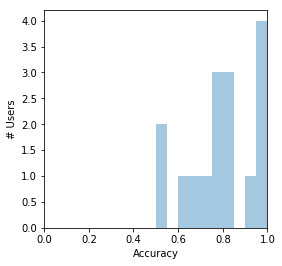

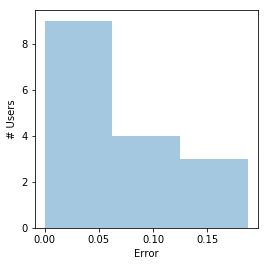

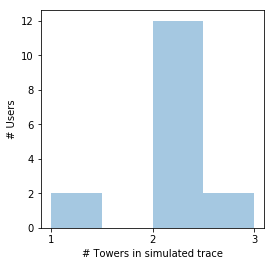

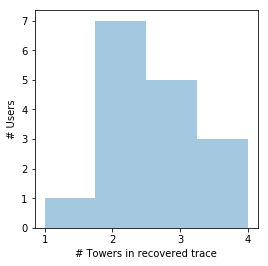

In [6]:
plot_all(evaluation)

# 16 users and 576 towers

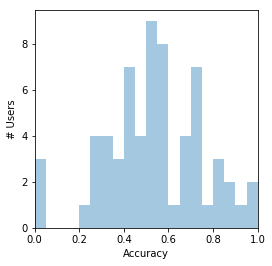

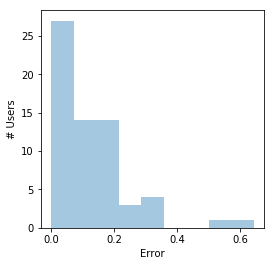

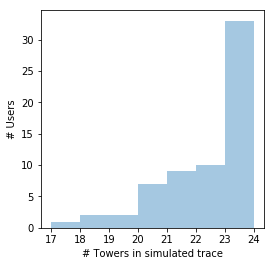

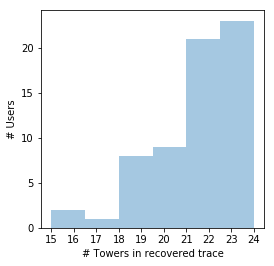

In [158]:
path = './evaluate/.tmp_eval_m_random_direction_u_64_t_576_v_(0.05, 0.05).pkl'
evaluation = pickle.load(open(path, 'rb'))

plot_all(evaluation)

# 576 users and 576 towers

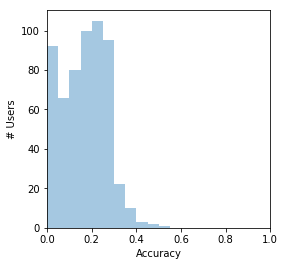

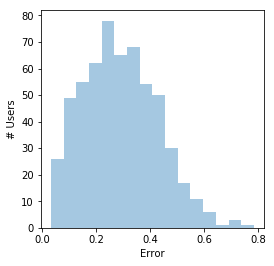

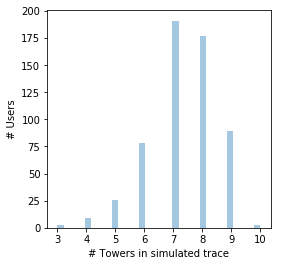

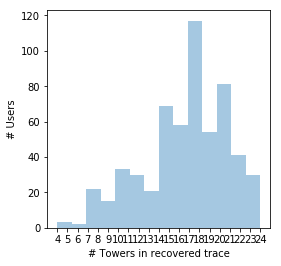

In [171]:
path = './evaluate/.tmp_eval_m_random_direction_u_576_t_576_v_(0.01, 0.01).pkl'
evaluation = pickle.load(open(path, 'rb'))

plot_all(evaluation)

In [159]:
%autoreload
from tracer.towers import TowersManager

In [160]:
evaluation.keys()

dict_keys(['analysis', 'simulator_towers', 'simulator_traces', 'simulator_aggregated_data', 'recovered_costs', 'recovered_distribution', 'recovered_traces'])

In [161]:
tm = TowersManager(evaluation['simulator_towers'])

In [162]:
np.argmax(evaluation['analysis'][0][2])

26

User 26 mapped to simulated trace 62
[193 218 219 244 245 270 271 294 318 341 364 387 411 434 457 480 504 528
 553 554 555 531 508 485]
[193 218 219 244 245 270 271 294 318 341 364 387 411 434 457 480 504 528
 553 554 555 531 508 485]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
24


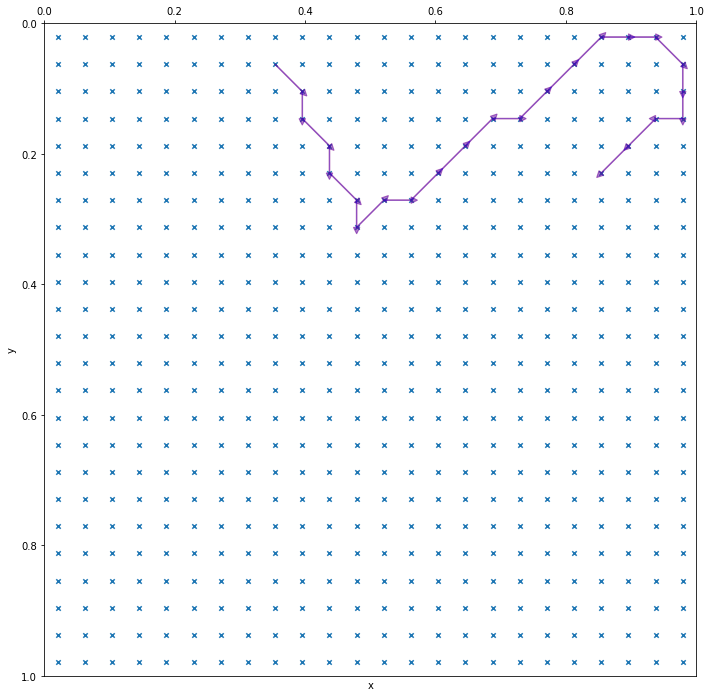

In [163]:
user = np.argmax(evaluation['analysis'][0][2])
recovered_trace = evaluation['recovered_traces'][user]
user_mapped_trace = evaluation['analysis'][0][0][user]
print(f'User {user} mapped to simulated trace {user_mapped_trace}')
mapped_trace = evaluation['simulator_traces'][user_mapped_trace]

print(recovered_trace)
print(mapped_trace)
print(recovered_trace == mapped_trace)
print(np.sum(recovered_trace == mapped_trace))

tm.plot_user_mapping_trace(recovered_trace, mapped_trace, annotate_towers=False)

In [164]:
np.set_printoptions(threshold=np.nan)

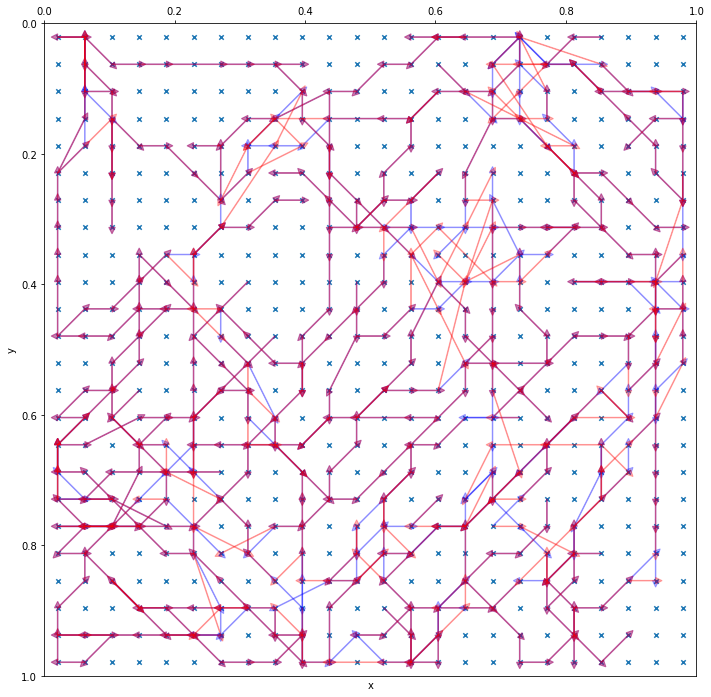

In [170]:
tm.plot_all_user_traces([
    (evaluation['simulator_traces'][:,0:10], 'b'),
    (evaluation['recovered_traces'][:,0:10], 'r'),
], annotate_towers=False)

In [133]:
i = 0

In [134]:
print(evaluation['simulator_aggregated_data'][i])

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [135]:
evaluation['recovered_traces'][:,i]

array([245, 455, 554, 318, 523,  76, 506,  39, 343,   6, 554,  81, 306,
       255, 363, 419])

In [136]:
evaluation['recovered_traces'][:,i+1]

array([268, 455, 553, 341, 523,  52, 530,  16, 342,  30, 529, 105, 281,
       279, 387, 467])

In [137]:
evaluation['recovered_distribution'][i]

array([  6,  39,  76,  81, 245, 255, 306, 318, 343, 363, 419, 455, 506,
       523, 554, 554])

In [138]:
evaluation['recovered_distribution'][i+1]

array([ 16,  30,  52, 105, 268, 279, 281, 341, 342, 387, 455, 467, 523,
       529, 530, 553])

In [139]:
evaluation['recovered_costs'][i+1]

array([[0.61941953, 0.37730771, 0.33592741, 0.30046261, 0.05892557,
        0.41874482, 0.50173311, 0.16666667, 0.17179607, 0.26352314,
        0.82073815, 0.45069391, 0.74185391, 0.52704628, 0.5153882 ,
        0.56672794],
       [0.804717  , 1.00173461, 1.03497853, 0.82495791, 0.8436857 ,
        0.44292274, 0.38414769, 0.76829537, 0.72767705, 0.83748964,
        0.        , 0.50173311, 0.20833333, 0.93169499, 0.8907316 ,
        0.94004285],
       [1.12190933, 0.93169499, 0.8789593 , 0.8436857 , 0.50689688,
        0.73715858, 0.80039053, 0.39528471, 0.41036908, 0.29462783,
        0.89945971, 0.41036908, 0.71321845, 0.05892557, 0.04166667,
        0.04166667],
       [0.68338414, 0.5       , 0.4658475 , 0.39528471, 0.11785113,
        0.38414769, 0.4658475 , 0.05892557, 0.04166667, 0.1767767 ,
        0.73833521, 0.32542707, 0.63601406, 0.42898459, 0.41036908,
        0.4658475 ],
       [0.88388348, 0.99390504, 1.0086432 , 0.82179512, 0.75115652,
        0.44876373, 0.42491829, 

In [140]:
evaluation['recovered_costs'][i+2]

array([[0.50173311, 0.76829537, 0.44876373, 0.41247896, 0.04166667,
        0.54326687, 0.45833333, 0.0931695 , 0.20833333, 0.25      ,
        0.83020245, 0.50173311, 0.39528471, 0.80147434, 0.4658475 ,
        0.46022338],
       [1.09052103, 0.79056942, 0.94280904, 0.76603235, 0.88290084,
        0.41247896, 0.45069391, 0.80902033, 0.67828419, 0.83333333,
        0.04166667, 0.4658475 , 0.96645113, 0.1767767 , 0.94004285,
        0.89945971],
       [0.97271813, 1.1916958 , 0.92233098, 0.85796918, 0.5153882 ,
        0.83333333, 0.74185391, 0.41036908, 0.44292274, 0.24295633,
        0.94004285, 0.5153882 , 0.08333333, 0.83748964, 0.04166667,
        0.08333333],
       [0.625     , 0.82705972, 0.55590267, 0.48591266, 0.17179607,
        0.52704628, 0.43501277, 0.04166667, 0.125     , 0.13176157,
        0.76034532, 0.39308255, 0.30046261, 0.71200031, 0.35600016,
        0.34359214],
       [1.07529066, 0.8789593 , 0.93634188, 0.76489832, 0.78616509,
        0.43501277, 0.42898459, 